   EmployeeID  Age  Gender Department            JobRole  YearsAtCompany  \
0           1   25    Male      Sales    Sales Executive               3   
1           2   32  Female         HR      HR Specialist               5   
2           3   28    Male         IT         IT Support               2   
3           4   45  Female      Sales      Sales Manager              10   
4           5   38    Male         IT  Software Engineer               6   

   WorkLifeBalance  JobSatisfaction  HourlyRate Attrition  
0                3                4          45       Yes  
1                2                3          35        No  
2                4                5          50        No  
3                3                4          60       Yes  
4                2                4          55        No  
Accuracy: 60.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.57      0.5

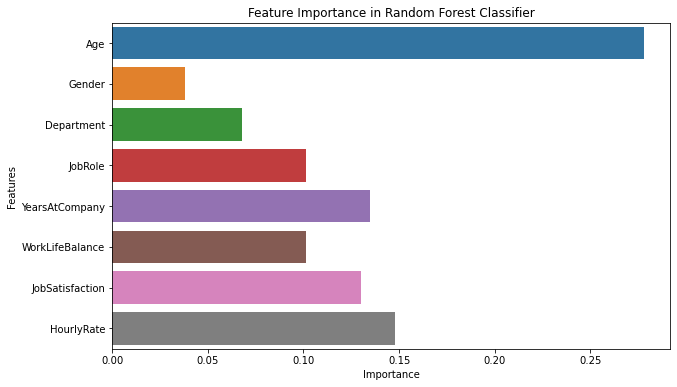

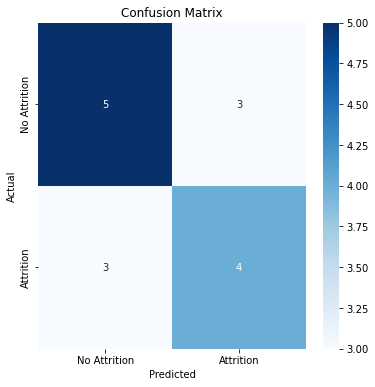

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('employee.csv')
print(df.head())
# Preprocessing: Convert categorical variables to numeric using LabelEncoder
le = LabelEncoder()

# Encode categorical columns
df['Gender'] = le.fit_transform(df['Gender'])  # Male=0, Female=1
df['Department'] = le.fit_transform(df['Department'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['Attrition'] = le.fit_transform(df['Attrition'])  # Yes=1, No=0

# Features (X) and Target (y)
X = df.drop(columns=['EmployeeID', 'Attrition'])  # Drop the EmployeeID and Attrition columns
y = df['Attrition']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance in Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Visualize the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
